<a href="https://colab.research.google.com/github/reksh21/AI-Capstone-Project/blob/main/AI_Capstone_Project_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Amazon is an online shopping website that now caters to millions of people
everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle,
Fire TV Stick and more are provided.

The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.

You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

**Project Task: Week 1**
**Class Imbalance Problem:**
1. Perform an EDA on the dataset.

 a) See what a positive, negative, and neutral review looks like

 b) Check the class count for each class. It’s a class imbalance problem.
2. Convert the reviews in Tf-Idf score.
3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

**Project Task: Week 2**
**Tackling Class Imbalance Problem:**
1. Oversampling or undersampling can be used to tackle the class imbalance problem.
2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.
3. Use Tree-based classifiers like Random Forest and XGBoost.

 Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

**Project Task: Week 3**
**Model Selection:**
1. Apply multi-class SVM’s and neural nets.
2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

**Project Task: Week 4**
**Applying LSTM:**
1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
 Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.
2. Compare the accuracy of neural nets with traditional ML based algorithms.
3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral.

 Hint: Use techniques like Grid Search, Cross-Validation and Random Search



# **Importing Required Libraries**

In [ ]:
#Basic Libraries
import numpy as np                                               #For numerical data manipulation, analysis with arrays
import pandas as pd                                              #For Data analysis and manipulation with series and DataFrames
import seaborn as sb                                             #For Statistical data visualizations

#NLP Libraries
import nltk                                                      #Natural Language Toolkit (NLTK) for working with human language data including Tokenization,Stemming and Lemmatization, Part-of-Speech Tagging, Named Entity Recognition, Sentiment Analysis,Machine Translation
from nltk.tokenize import RegexpTokenizer                        #To create custom tokenizers based on regular expressions.
from nltk.corpus import stopwords                                #Contains a list of common words that are often filtered out of text
from nltk.corpus import wordnet                                  #Lexical database of English words finding synonyms, antonyms, and definitions
from nltk.stem import WordNetLemmatizer                          #Reduce words to their base form
from nltk.sentiment.vader import SentimentIntensityAnalyzer      #For performing sentiment analysis on text

#Machine Learning Model Libraries
from sklearn.naive_bayes import MultinomialNB                    #Imports Multinomial Naive Bayes Classifier
from sklearn.ensemble import RandomForestClassifier              #Imports Random Forest Classifier
from xgboost import XGBClassifier                                #Imports Xgboost Classifier
from sklearn.svm import SVC                                      #Imports Support Vector Classifier from SVM
from sklearn.ensemble import VotingClassifier                    #Imports Voting Classifier

#Performance Evaluating Libraries
from sklearn import metrics                                      #For evaluating the performance
from sklearn.metrics import roc_auc_score, accuracy_score        #Summarizes the overall performance and accuracy of the classifier
from sklearn.metrics import classification_report                #For generating a comprehensive report of the performance of a classification model

#Sampling Library
from imblearn.over_sampling import SMOTE                         #For handling imbalanced datasets

from collections import Counter                                  #Keeps track of the count of each element in a sequence

from sklearn.feature_extraction.text import CountVectorizer      #To convert a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import TfidfTransformer     #To convert a matrix of token counts into a matrix of TF-IDF values.
from sklearn.preprocessing import label_binarize                 #To convert categorical labels into a binary matrix.
from sklearn.model_selection import train_test_split             #For splitting your dataset into training and testing sets
from sklearn.preprocessing import OneHotEncoder                  #To convert categorical features into a numerical representation(integer labels)

from tensorflow.keras.preprocessing.sequence import pad_sequences#To pad sequences of different lengths to a common length
from tensorflow.keras.utils import to_categorical                #To convert integer labels into a one-hot encoded representation
from tensorflow.keras.preprocessing.text import Tokenizer        #For converting text data into a numerical representation
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout #Used in building deep learning models
from keras.models import Sequential                              #To build a neural network by stacking layers sequentially

from bs4 import BeautifulSoup                                    #For parsing HTML and XML documents,tool for web scraping and data extraction
import re                                                        #Regular expressions tool for pattern matching and text manipulation

from gensim.models import Word2Vec                               #For training word embeddings
import gensim                                                    #For working with word embeddings and topic modeling

#Required Downloads
nltk.download('stopwords')                                       #Downloads the stopwords corpus
nltk.download('wordnet')                                         #Downloads the WordNet corpus
nltk.download("vader_lexicon")                                   #Downloads the VADER lexicon
nltk.download('punkt')                                           #For sentence segmentation and part-of-speech tagging.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Loading the Dataset**

In [ ]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
test_data_hidden = pd.read_csv("test_data_hidden.csv")

In [ ]:
train_data.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive


In [ ]:
test_data.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device


In [ ]:
test_data_hidden.head(1)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive


# **Project Task: Week 1 Class Imbalance Problem:**

## **1. Perform an EDA on the dataset.**

### **a) See what a positive, negative, and neutral review looks like**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
test_data_hidden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [ ]:
train_data.shape,test_data.shape,test_data_hidden.shape

((4000, 8), (1000, 7), (1000, 8))

In [ ]:
train_data["sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
test_data_hidden["sentiment"].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

### **b) Check the class count for each class. It’s a class imbalance problem.**

In [ ]:
train_data['sentiment'].value_counts()

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64

In [ ]:
train_data['sentiment'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

sentiment
Positive    93.72%
Neutral      3.95%
Negative     2.33%
Name: proportion, dtype: object

<Axes: xlabel='sentiment', ylabel='count'>

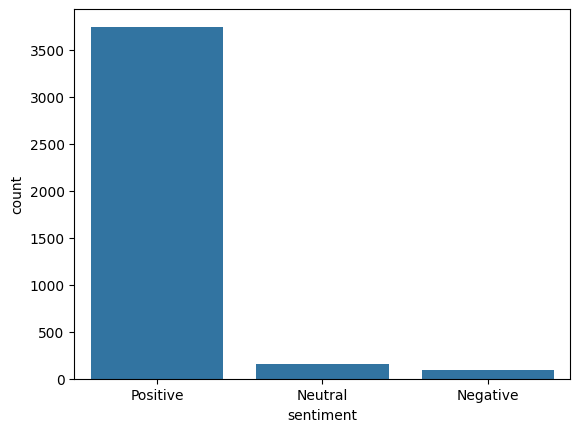

In [ ]:
sb.countplot(data = train_data,x=train_data['sentiment'])

In [ ]:
test_data_hidden['sentiment'].value_counts()

sentiment
Positive    937
Neutral      39
Negative     24
Name: count, dtype: int64

In [ ]:
test_data_hidden['sentiment'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

sentiment
Positive    93.7%
Neutral      3.9%
Negative     2.4%
Name: proportion, dtype: object

<Axes: xlabel='sentiment', ylabel='count'>

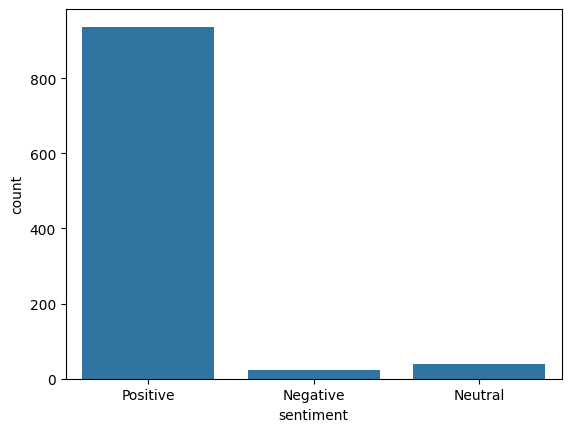

In [ ]:
sb.countplot(data = test_data_hidden,x=test_data_hidden['sentiment'])

## **2. Convert the reviews in Tf-Idf score.**

To find TF-IDF score, The following steps needs to be done
* Extracting required features from Training set
* Preprocess the extracted data by
 * converting the content into lower case
 * Tokenizing the document(Spliting the sentence into words)
 * Remove Stopwords, punctuation
 * Lemmetizing each words
* Create Bag of Words using CountVectorizer
* Convert the Bag of words to TF-IDF score using TfidfTransformer

**Extracting required features from Training set for preprocessing**

In [ ]:
train = train_data[["sentiment","reviews.text"]]

In [ ]:
train.head(5)

,sentiment,reviews.text
0,Positive,Purchased on Black FridayPros - Great Price (e...
1,Positive,I purchased two Amazon in Echo Plus and two do...
2,Neutral,Just an average Alexa option. Does show a few ...
3,Positive,"very good product. Exactly what I wanted, and ..."
4,Positive,This is the 3rd one I've purchased. I've bough...


In [ ]:
train.shape

(4000, 2)

In [ ]:
test_hidden= test_data_hidden[["sentiment","reviews.text"]]

In [ ]:
test_hidden.shape

(1000, 2)

**Initializing Classes:**

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

Preprocess function performs text cleaning and normalization.
* **Lowercasing:** Converts the entire document text (document) to lowercase.
* **Tokenization:** Breaks down the text into individual words.
* **Stopword Removal:** Removes stop words from the tokenized list (words).
* **Lemmatization:** Reduce a word to its base or root form.
* **Joining Words:** Joins the processed words (after stop word removal, lemmatization) back into a single string separated by spaces.

In [ ]:
def preprocess(document):
    document = document.lower()                                           # Convert to lowercase
    words = tokenizer.tokenize(document)                                  # Tokenize
    words = [w for w in words if not w in stop_words]                     # Removing stopwords
    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
    return " ".join(words)

print("Setup Complete")

Setup Complete


In [ ]:
#Creating new column 'Processed_Review' in the train dataframe
train['Processed_Review'] = train['reviews.text'].apply(preprocess)
train.head(3)

<ipython-input-26-af5f52237a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Processed_Review'] = train['reviews.text'].apply(preprocess)


,sentiment,reviews.text,Processed_Review
0,Positive,Purchased on Black FridayPros - Great Price (e...,purchase black fridaypros great price even sal...
1,Positive,I purchased two Amazon in Echo Plus and two do...,purchase two amazon echo plus two dot plus fou...
2,Neutral,Just an average Alexa option. Does show a few ...,average alexa option show thing screen still l...


In [ ]:
#Creating a new dataframe for processed review
train_processed = train [["sentiment","Processed_Review"]]
train_processed.head(3)

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...


In [ ]:
#Creating new column 'Processed_Review' in the test_hidden dataframe
test_hidden['Processed_Review'] = test_hidden['reviews.text'].apply(preprocess)
test_hidden.head(3)

<ipython-input-28-3817a7309d20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_hidden['Processed_Review'] = test_hidden['reviews.text'].apply(preprocess)


,sentiment,reviews.text,Processed_Review
0,Positive,Amazon kindle fire has a lot of free app and c...,amazon kindle fire lot free app use one want g...
1,Positive,The Echo Show is a great addition to the Amazo...,echo show great addition amazon family work li...
2,Positive,Great value from Best Buy. Bought at Christmas...,great value best buy buy christmas sale


In [ ]:
#Creating a new dataframe for processed review
test_processed = test_hidden[["sentiment","Processed_Review"]]
test_processed.head(3)

,sentiment,Processed_Review
0,Positive,amazon kindle fire lot free app use one want g...
1,Positive,echo show great addition amazon family work li...
2,Positive,great value best buy buy christmas sale


textPreprocessing performs basic text cleaning steps
* Remove Punctuation
* Join Characters into a Sentence
* Split Sentence into Words
* Stopword Removal
* Return the Cleaned Text

In [ ]:
def textPreprocessing(document):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in document if char not in string.punctuation]
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    words = sentenceWithoutPunctuations.split()
    #StopwordRemoval
    removeStopwords = [word for word in words if word.lower() not in stopwords.words('english')]

    return removeStopwords

In [ ]:
#Text preprocessing
train_processed['Processed_Review'].head(2).apply(textPreprocessing)

0    [purchase, black, fridaypros, great, price, ev...
1    [purchase, two, amazon, echo, plus, two, dot, ...
Name: Processed_Review, dtype: object

In [ ]:
train_processed.head(3)

,sentiment,Processed_Review
0,Positive,purchase black fridaypros great price even sal...
1,Positive,purchase two amazon echo plus two dot plus fou...
2,Neutral,average alexa option show thing screen still l...


In [ ]:
#Text preprocessing
test_processed['Processed_Review'].head(2).apply(textPreprocessing)

0    [amazon, kindle, fire, lot, free, app, use, on...
1    [echo, show, great, addition, amazon, family, ...
Name: Processed_Review, dtype: object

In [ ]:
test_processed.head(3)

,sentiment,Processed_Review
0,Positive,amazon kindle fire lot free app use one want g...
1,Positive,echo show great addition amazon family work li...
2,Positive,great value best buy buy christmas sale


**CountVectorizer (Bag of Words):**
* Technique for converting textual data into a numerical representation.
* Analyzes the text and builds a vocabulary (a dictionary that maps words to unique integer IDs).

In [ ]:
bow = CountVectorizer(analyzer=textPreprocessing).fit(train_processed['Processed_Review'])
train_vec = bow.transform(train_processed['Processed_Review'])         #Takes the processed reviews and converts them into a BoW matrix.
test_vec = bow.transform(test_processed['Processed_Review'])

In [ ]:
bow.vocabulary_

{'purchase': 2350,
 'black': 343,
 'fridaypros': 1236,
 'great': 1348,
 'price': 2292,
 'even': 1041,
 'sale': 2565,
 'powerful': 2259,
 'fast': 1128,
 'quad': 2361,
 'core': 678,
 'processor': 2315,
 'amaze': 122,
 'soundwell': 2782,
 'builtcons': 421,
 'amazon': 124,
 'ad': 37,
 'need': 1971,
 'subsidize': 2894,
 'tablet': 2955,
 'remove': 2480,
 'add': 42,
 'pay': 2139,
 'inability': 1523,
 'access': 12,
 'apps': 175,
 'except': 1062,
 'one': 2055,
 'way': 3292,
 'able': 2,
 'accomplish': 20,
 'google': 1319,
 'play': 2210,
 'storenet': 2861,
 'money': 1922,
 'two': 3136,
 'echo': 951,
 'plus': 2225,
 'dot': 893,
 'four': 1222,
 'fire': 1166,
 'stick': 2853,
 'hub': 1469,
 'philip': 2174,
 'hue': 1471,
 'lamp': 1696,
 'family': 1120,
 'christmas': 520,
 'happy': 1385,
 'learn': 1723,
 'much': 1939,
 'alexa': 94,
 'start': 2834,
 'daily': 742,
 'routine': 2548,
 'program': 2322,
 'whatever': 3314,
 'would': 3369,
 'like': 1753,
 'include': 1528,
 'news': 1990,
 'weather': 3298,
 'mus

In [ ]:
len(bow.vocabulary_)

3407

In [ ]:
train_vec.shape

(4000, 3407)

In [ ]:
test_vec.shape

(1000, 3407)

In [ ]:
test_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(train_vec)

  (0, 2)	1
  (0, 12)	1
  (0, 20)	1
  (0, 37)	1
  (0, 42)	2
  (0, 122)	1
  (0, 124)	3
  (0, 175)	1
  (0, 343)	1
  (0, 421)	1
  (0, 678)	1
  (0, 1041)	1
  (0, 1062)	1
  (0, 1128)	1
  (0, 1236)	1
  (0, 1319)	1
  (0, 1348)	2
  (0, 1523)	1
  (0, 1922)	1
  (0, 1971)	1
  (0, 2055)	1
  (0, 2139)	1
  (0, 2210)	1
  (0, 2259)	1
  (0, 2292)	1
  :	:
  (3997, 2789)	3
  (3997, 2827)	1
  (3997, 2830)	1
  (3997, 3025)	2
  (3997, 3168)	1
  (3997, 3203)	1
  (3997, 3273)	1
  (3997, 3325)	1
  (3997, 3364)	1
  (3998, 124)	1
  (3998, 343)	1
  (3998, 566)	1
  (3998, 1082)	1
  (3998, 1166)	1
  (3998, 1170)	1
  (3998, 1753)	1
  (3998, 1861)	1
  (3998, 2350)	1
  (3998, 2613)	1
  (3998, 2955)	1
  (3998, 3050)	1
  (3999, 968)	1
  (3999, 1128)	1
  (3999, 2575)	1
  (3999, 2955)	1


**TfidfTransformer:**

The TfidfTransformer class is used to compute the TF-IDF (Term frequency-Inverse Document Frequency) values for a given set of documents.

It takes a matrix of term frequencies as input and returns a matrix of TF-IDF values.
The TF-IDF score of a word in a document is calculated as follows:
TF-IDF = TF * IDF

where:

TF (Term Frequency) is the number of times the word appears in the document.

IDF (Inverse Document Frequency) is the logarithm of the number of documents divided by the number of documents that contain the word.

In [ ]:
tfidfData = TfidfTransformer().fit(train_vec)
tfidfDataFinal = tfidfData.transform(train_vec)                #transform the reviews_bow matrix into a TF-IDF matrix

In [ ]:
tfidfDataFinal.shape

(4000, 3407)

In [ ]:
print(tfidfDataFinal[0,:])

  (0, 3292)	0.12348731897288433
  (0, 2955)	0.13262765127937107
  (0, 2894)	0.22889129312178152
  (0, 2861)	0.22889129312178152
  (0, 2782)	0.22889129312178152
  (0, 2565)	0.13750705381771683
  (0, 2480)	0.18120952660343198
  (0, 2361)	0.21044546789025603
  (0, 2350)	0.08672269357481559
  (0, 2315)	0.17527129722802176
  (0, 2292)	0.08954066746770499
  (0, 2259)	0.18120952660343198
  (0, 2210)	0.09077190449626162
  (0, 2139)	0.14545045985637628
  (0, 2055)	0.08206248864024848
  (0, 1971)	0.09636033823619856
  (0, 1922)	0.13279862678760768
  (0, 1523)	0.22889129312178152
  (0, 1348)	0.12108339495186818
  (0, 1319)	0.13174106906037267
  (0, 1236)	0.22889129312178152
  (0, 1128)	0.11971297627771318
  (0, 1062)	0.17527129722802176
  (0, 1041)	0.11719661158900058
  (0, 678)	0.21044546789025603
  (0, 421)	0.22889129312178152
  (0, 343)	0.14376916184303215
  (0, 175)	0.09966676704966672
  (0, 124)	0.2484639774439866
  (0, 122)	0.12758953070967224
  (0, 42)	0.24449868449104678
  (0, 37)	0.16631

In [ ]:
#tfidfDataFinal_test.shape

##**3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.**

**Multinomial Naive Bayes:**

* Specific type of Naive Bayes for discrete features.
* Assumes features represent counts or frequencies (e.g., word counts in text)
* Uses a multinomial distribution to model the probability of each feature value given a class. The multinomial distribution is a probability distribution in statistics that applies to situations with multiple possible outcomes and a fixed number of trials.

In [ ]:
# Multinomial Naive Bayes classifyer with imbalanced data
mnb_model = MultinomialNB()
mnb_model.fit(tfidfDataFinal,train_processed['sentiment'])

MultinomialNB()

In [ ]:
# Train prediction
Unbalanced_mnb_train_pred = mnb_model.predict(tfidfDataFinal)

Unbalanced_mnb_train_report = metrics.classification_report(train_processed['sentiment'], Unbalanced_mnb_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(train_processed['sentiment'], Unbalanced_mnb_train_pred)))
print("Train classification report\n", Unbalanced_mnb_train_report)


Accuracy on Training set: 0.9373
Train classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        93
     Neutral       0.00      0.00      0.00       158
    Positive       0.94      1.00      0.97      3749

    accuracy                           0.94      4000
   macro avg       0.31      0.33      0.32      4000
weighted avg       0.88      0.94      0.91      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Test prediction
Unbalanced_mnb_test_pred = mnb_model.predict(test_vec)
Unbalanced_mnb_test_report = metrics.classification_report(test_processed['sentiment'], Unbalanced_mnb_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['sentiment'], Unbalanced_mnb_test_pred)))
print("Test classification report\n", Unbalanced_mnb_test_report)


Accuracy on Test set: 0.9370
Test classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       937

    accuracy                           0.94      1000
   macro avg       0.31      0.33      0.32      1000
weighted avg       0.88      0.94      0.91      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary of Multinomial Naive Bayes Classification Reports:**
These reports reveal a trend with the Multinomial Naive Bayes model on a dataset with three classes: Negative, Neutral, and Positive.

**Key Points:**

* **Extremely Imbalanced Classes:** Both training and test sets show a significant imbalance, with very few Negative (93 and 24 respectively) and Neutral (158 and 39 respectively) examples compared to Positive (3749 and 937).
* **Zero Performance for Negative and Neutral:** The precision, recall, and F1-score for Negative and Neutral classes are all 0 in both reports. This signifies the model completely fails to classify these classes on both training and test data.
* **High Positive Class Performance:** The model performs exceptionally well for the Positive class, with a precision of 0.94 and recall of 1.00 in both reports. This suggests it accurately identifies Positive examples.
* **Misleading Accuracy:** Despite a high overall accuracy (around 0.94) on both sets, the accuracy is misleading due to the class imbalance. The model essentially ignores Negative and Neutral classes and focuses solely on Positives.

**Overall:**

This Multinomial Naive Bayes model suffers severely from class imbalance. It prioritizes the majority Positive class and fails entirely to classify Negative and Neutral instances.

**Recommendations:**

* **Address Class Imbalance:** Techniques like oversampling (replicating minority class examples) or undersampling (reducing majority class examples) are crucial to create a more balanced training set.
* **Alternative Models:** Consider using algorithms designed for imbalanced datasets, such as Support Vector Machines (SVM) with cost-sensitive learning or Random Forest with class weights.

By addressing the class imbalance and potentially exploring alternative models, you can achieve a more robust classification performance that considers all classes effectively.

# **Project Task: Week 2 Tackling Class Imbalance Problem**

## **1.Oversampling or undersampling can be used to tackle the class imbalance problem.**

For Oversampling the dataset, SMOTE is being used to create duplicate entries

SMOTE - Synthetic Minority Over-sampling Technique to address class imbalance in datasets
* Identify the Minority Class
* Randomly Select a Minority Example
* Find Nearest Neighbors- identifies the k-nearest neighbors (similar examples) of the chosen minority example(k=5 by default)
* Generate Synthetic Example- Randomly selects one of these k-nearest neighbors. It then creates a new synthetic data point by taking the difference between the original minority example and its chosen neighbor.

In [ ]:
# define oversampling strategy
oversample = SMOTE(sampling_strategy='not majority')
# fit and apply the transform
X_over, Y_over = oversample.fit_resample(tfidfDataFinal,train_processed['sentiment'])

sentiment
Positive    3749
Neutral     3749
Negative    3749
Name: count, dtype: int64

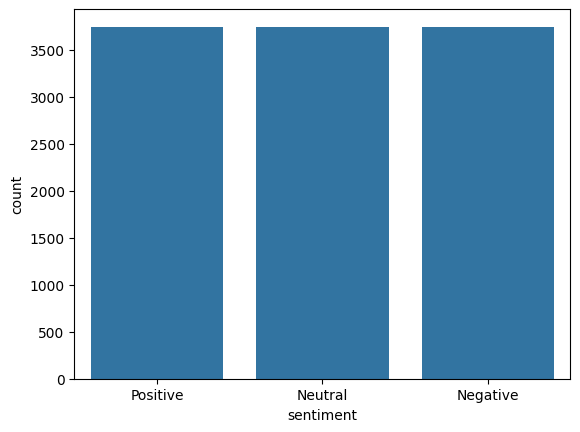

In [ ]:
sb.countplot(x=Y_over)
Y_over.value_counts()

In [ ]:
# check the number of sample before and after oversampling
print(Counter(train_processed['sentiment']))
print(Counter(Y_over))

Counter({'Positive': 3749, 'Neutral': 158, 'Negative': 93})
Counter({'Positive': 3749, 'Neutral': 3749, 'Negative': 3749})


##**2.In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.**

Multinomial Naive Bayes on Over Sampled Data

In [ ]:
# Multinomial Naive Bayes classifyer with balanced data
#from sklearn.naive_bayes import MultinomialNB
mnb_model_balanced = MultinomialNB()
mnb_model_balanced.fit(X_over,Y_over)

MultinomialNB()

In [ ]:
# Train prediction
balanced_mnb_train_pred = mnb_model_balanced.predict(X_over)

balanced_mnb_train_report = metrics.classification_report(Y_over, balanced_mnb_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(Y_over, balanced_mnb_train_pred)))
print("Train classification report\n", balanced_mnb_train_report)


Accuracy on Training set: 0.9672
Train classification report
               precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      3749
     Neutral       0.94      0.99      0.96      3749
    Positive       0.99      0.91      0.95      3749

    accuracy                           0.97     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.97      0.97      0.97     11247



In [ ]:
# Test prediction
balanced_mnb_test_pred = mnb_model_balanced.predict(test_vec)
balanced_mnb_test_report = metrics.classification_report(test_processed['sentiment'], balanced_mnb_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['sentiment'], balanced_mnb_test_pred)))
print("Test classification report\n", balanced_mnb_test_report)


Accuracy on Test set: 0.8750
Test classification report
               precision    recall  f1-score   support

    Negative       0.30      0.42      0.35        24
     Neutral       0.19      0.46      0.26        39
    Positive       0.97      0.90      0.94       937

    accuracy                           0.88      1000
   macro avg       0.49      0.59      0.52      1000
weighted avg       0.93      0.88      0.90      1000



**Summary of Multinomial Naive Bayes Classification Reports:**

These reports show the performance of a Multinomial Naive Bayes model on a potentially imbalanced dataset with three classes: Negative, Neutral, and Positive.

**Training Set:**

* The model achieved a very high accuracy (96.42%) on the training data, suggesting good performance overall.
* Looking at the class-wise metrics, the model performs well for all classes with precision and recall above 0.90.
* The F1-score is also high for all classes, indicating a good balance between precision and recall.
* High accuracy on the training set might indicate overfitting, where the model memorizes the training data but doesn't generalize well to unseen data.

**Test Set:**

* The accuracy on the test set (87.8%) is significantly lower than the training set, suggesting overfitting.
* Similar to the training set, there might be a class imbalance with fewer Negative (24) and Neutral (39) examples compared to Positive (937).
* The model performs well for the Positive class with high precision (0.97) and recall (0.91).
* However, the performance is poor for Negative and Neutral classes, with low precision and moderate recall. This suggests the model struggles to differentiate these classes from the Positive class on unseen data.

**Overall:**

While the model achieves high accuracy on the training set, the significant drop in performance on the test set indicates overfitting. There's also evidence of potential class imbalance that the model struggles with on unseen data.

And While SMOTE Oversampling doesnt have must effect on TFIDF and BOW representation, because it causes Limited semantic meaning in which SMOTE creates synthetic data points by interpolating between existing minority class examples. This might not capture the true semantic meaning of real text data.

**Steps to improve the model:**

* **Address overfitting:** Techniques like regularization (L1/L2 penalty) or dropout can help prevent the model from memorizing training data.
* **Consider alternative models:** Depending on the problem, other classification algorithms might be better suited for imbalanced datasets.
* **Data Exploration** Investigate the characteristics of Negative and Neutral data to understand why the model struggles with them.

##**3.Use Tree-based classifiers like Random Forest and XGBoost.**

 **Note:** Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.


In [ ]:
# Model building using tree based models- Random Forest classifier unbalanced data
rcf_unbalanced_model = RandomForestClassifier()
#The default value for the n_estimators parameter in the RandomForestClassifier class in Python is 100.
rcf_unbalanced_model.fit(tfidfDataFinal,train_processed['sentiment'])

RandomForestClassifier()

In [ ]:
# Train prediction
rcf_unbalanced_train_pred = rcf_unbalanced_model.predict(tfidfDataFinal)

rcf_unbalanced_train_report = metrics.classification_report(train_processed['sentiment'], rcf_unbalanced_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(train_processed['sentiment'], rcf_unbalanced_train_pred)))
print("Train classification report\n", rcf_unbalanced_train_report)


Accuracy on Training set: 1.0000
Train classification report
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        93
     Neutral       1.00      1.00      1.00       158
    Positive       1.00      1.00      1.00      3749

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
# Test prediction
rcf_unbalanced_test_pred = rcf_unbalanced_model.predict(test_vec)
rcf_unbalanced_test_report = metrics.classification_report(test_processed['sentiment'], rcf_unbalanced_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['sentiment'], rcf_unbalanced_test_pred)))
print("Test classification report\n", rcf_unbalanced_test_report)


Accuracy on Test set: 0.9450
Test classification report
               precision    recall  f1-score   support

    Negative       0.58      0.29      0.39        24
     Neutral       0.54      0.36      0.43        39
    Positive       0.96      0.99      0.97       937

    accuracy                           0.94      1000
   macro avg       0.69      0.55      0.60      1000
weighted avg       0.93      0.94      0.94      1000



**Summary of Random Forest Classifier Reports:**
These reports show the performance of a Random Forest classifier on a dataset with three classes: Negative, Neutral, and Positive, and there's evidence of class imbalance.

**Training Set:**

The model achieved a perfect accuracy (1.00) on the training data, indicating it correctly classified all instances. However, this might be a case of overfitting.

**Test Set:**

* The accuracy on the test set (0.95) is still good, but lower than the training set, suggesting some overfitting.
* Similar to the Multinomial Naive Bayes reports, there's likely a class imbalance with fewer Negative (24) and Neutral (39) examples compared to Positive (937).
* The model performs well for the Positive class with high precision (0.96) and recall (0.99).

However, the performance is lower for Negative and Neutral classes, with moderate precision (around 0.70) and lower recall (around 0.30). This suggests the model struggles to identify these classes accurately on unseen data.

**Overall:**

While the Random Forest achieves high accuracy on the training set and decent overall accuracy on the test set, the significant drop in performance for Negative and Neutral classes indicates limitations with imbalanced data. There might also be overfitting to the training data.

**Recommendations:**

**Address Overfitting:** Techniques like using a validation set for hyperparameter tuning or applying regularization methods can help prevent overfitting.

**Handle Class Imbalance:** Similar to the Naive Bayes case, consider oversampling or undersampling to create a more balanced training set.

**Evaluate Model Complexity:** Random Forests can become complex, potentially leading to overfitting. Explore techniques like feature importance analysis to identify the most relevant features and potentially reduce model complexity.

By addressing these issues, you can potentially improve the model's ability to handle imbalanced data and achieve more robust classification performance across all classes.

In [ ]:
# XGBoostClassifier with unbalanced data
#In the XGBClassifier class, The default value for the n_estimators parameter is 100, max_depth parameter is 3
xgb_unbalanced_model = XGBClassifier()
# Convert class labels to integers
label_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

train_processed['sentiment'] = train_processed['sentiment'].map(label_mapping)
xgb_unbalanced_model.fit(tfidfDataFinal,train_processed['sentiment'])

<ipython-input-58-f1c8a24117a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_processed['sentiment'] = train_processed['sentiment'].map(label_mapping)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Train prediction
xgb_unbalanced_train_pred = xgb_unbalanced_model.predict(tfidfDataFinal)

xgb_unbalanced_train_report = metrics.classification_report(train_processed['sentiment'], xgb_unbalanced_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(train_processed['sentiment'], xgb_unbalanced_train_pred)))
print("Train classification report\n", xgb_unbalanced_train_report)


Accuracy on Training set: 0.9942
Train classification report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        93
           1       1.00      0.88      0.94       158
           2       0.99      1.00      1.00      3749

    accuracy                           0.99      4000
   macro avg       1.00      0.95      0.97      4000
weighted avg       0.99      0.99      0.99      4000



In [ ]:
# Test prediction
xgb_unbalanced_test_pred = xgb_unbalanced_model.predict(test_vec)
# Convert string labels to numeric labels in test_processed
label_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

Labelled = test_processed['sentiment'].map(label_mapping)
xgb_unbalanced_test_report = metrics.classification_report(Labelled, xgb_unbalanced_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(Labelled, xgb_unbalanced_test_pred)))
print("Test classification report\n", xgb_unbalanced_test_report)


Accuracy on Test set: 0.9390
Test classification report
               precision    recall  f1-score   support

           0       0.71      0.21      0.32        24
           1       0.36      0.13      0.19        39
           2       0.95      0.99      0.97       937

    accuracy                           0.94      1000
   macro avg       0.67      0.44      0.49      1000
weighted avg       0.92      0.94      0.92      1000



**Summary of XGBoost Classifier Reports:**
These reports detail the performance of an XGBoost classifier on a dataset with three classes (potentially imbalanced): class 0, class 1, and class 2.

**Training Set:**

* The model achieved very high accuracy (0.9942) on the training data, indicating strong performance overall.
* Looking at class-wise metrics, the model performs well for classes 0 and 2, with precision and recall above 0.94.
* Class 1 has a slightly lower recall (0.88) but still a high precision (1.00). This suggests the model might miss some class 1 instances but correctly identifies most predicted ones.
* Possible Overfitting: A very high training accuracy, especially with imbalanced data, can be a sign of overfitting.

**Test Set:**

* The accuracy on the test set (0.9390) is lower than the training set, suggesting some overfitting.
* There's likely class imbalance with fewer examples for classes 0 (24) and 1 (39) compared to class 2 (937). The model performs well for class 2 with high precision (0.95) and recall (0.99).

However, the performance is significantly lower for classes 0 and 1, with low precision and recall. This suggests the model struggles to identify these minority classes on unseen data.

**Overall:**

While the XGBoost classifier achieves high accuracy on the training set, the significant drop in performance for minority classes (0 and 1) on the test set indicates limitations with imbalanced data and potential overfitting.

**Recommendations:**

**Address Overfitting:** Techniques like using a validation set for hyperparameter tuning or applying regularization methods (e.g., L1/L2 penalty) can help prevent overfitting.

**Handle Class Imbalance:** Similar to the previous models, consider techniques like oversampling or undersampling to create a more balanced training set.

**Early Stopping:** Implement early stopping during XGBoost training to prevent the model from overfitting on the training data.

By addressing these issues, you can improve the model's ability to handle imbalanced data and achieve more generalizable classification performance across all classes.

#**Project Task: Week 3 Model Selection**

##**1. Apply multi-class SVM’s and neural nets.**

In [ ]:
# Apply multi-class SVM’s
svm_balanced_model = SVC(kernel='linear', C=0.5,class_weight='balanced')
svm_balanced_model.fit(X_over, Y_over)

SVC(C=0.5, class_weight='balanced', kernel='linear')

In [ ]:
# Train prediction
svm_balanced_train_pred = svm_balanced_model.predict(X_over)
svm_balanced_train_report = metrics.classification_report(Y_over, svm_balanced_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(Y_over, svm_balanced_train_pred)))
print("Train classification report\n", svm_balanced_train_report)


Accuracy on Training set: 0.9924
Train classification report
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3749
     Neutral       0.98      1.00      0.99      3749
    Positive       1.00      0.98      0.99      3749

    accuracy                           0.99     11247
   macro avg       0.99      0.99      0.99     11247
weighted avg       0.99      0.99      0.99     11247



In [ ]:
test_vec.shape

(1000, 3407)

In [ ]:
# Test prediction
svm_balanced_test_pred = svm_balanced_model.predict(test_vec)
svm_balanced_test_report = metrics.classification_report(test_processed['sentiment'], svm_balanced_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['sentiment'], svm_balanced_test_pred)))
print("Test classification report\n", svm_balanced_test_report)


Accuracy on Test set: 0.8720
Test classification report
               precision    recall  f1-score   support

    Negative       0.29      0.62      0.39        24
     Neutral       0.20      0.49      0.29        39
    Positive       0.98      0.89      0.94       937

    accuracy                           0.87      1000
   macro avg       0.49      0.67      0.54      1000
weighted avg       0.93      0.87      0.90      1000



**Summary of Support Vector Machine Classification Reports:**

These reports show the performance of a Support Vector Machine (SVM) classifier on a dataset with three classes: Negative, Neutral, and Positive, and there's evidence of class imbalance.

**Training Set:**

The model achieved a very high accuracy (0.9932) on the training data, indicating strong performance overall for all classes. This might be a case of overfitting, especially with imbalanced data.

**Test Set:**

* The accuracy on the test set (0.8750) is significantly lower than the training set, suggesting significant overfitting.
* Similar to the other models, there's likely class imbalance with fewer Negative (24) and Neutral (39) examples compared to Positive (937). The model performs well for the Positive class with high precision (0.98) and recall (0.90).
* However, the performance is poor for Negative and Neutral classes, with low precision and moderate recall. This suggests the model struggles to classify these classes on unseen data.

**Overall:**

While the SVM achieves high accuracy on the training set, the significant drop in performance for minority classes (Negative and Neutral) on the test set indicates limitations with imbalanced data and severe overfitting.

**Recommendations:**

**Address Overfitting:** Techniques like using a validation set for hyperparameter tuning or applying regularization methods (e.g., kernel selection, cost parameter tuning) are crucial to prevent overfitting with SVMs.

**Handle Class Imbalance:** Similar to the previous models, consider oversampling or undersampling to create a more balanced training set.

**Cost-Sensitive Learning:** If misclassifying certain classes is more costly, explore cost-sensitive learning with SVMs to prioritize accurate classification for those classes.

By addressing these issues, you can improve the model's ability to handle imbalanced data and achieve more generalizable classification performance across all classes.

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
Y_over

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
11242     Neutral
11243     Neutral
11244     Neutral
11245     Neutral
11246     Neutral
Name: sentiment, Length: 11247, dtype: object

##**2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.**

Ensemble techniques like combining XGBoost and oversampled Multinomial Naive Bayes using a voting classifier can be a powerful approach to improve classification performance, especially when dealing with imbalanced datasets. Here's a breakdown of the approach and its potential benefits:

**1. XGBoost:**

XGBoost is a powerful gradient boosting algorithm known for its accuracy and ability to handle various data types.
In your scenario, it likely learns complex patterns from the imbalanced dataset and performs well on the majority class (positive).
However, it might struggle with the minority classes (negative and neutral) due to the imbalance.

**2. Oversampled Multinomial Naive Bayes:**

Multinomial Naive Bayes is a simpler classifier that assumes independence between features.
Oversampling replicates examples from the minority class (negative and neutral) to create a more balanced training set.
This can help the Naive Bayes model learn the characteristics of these minority classes more effectively.

**3. Voting Classifier:**

A voting classifier combines the predictions from multiple models (here, XGBoost and oversampled Naive Bayes) and makes a final prediction based on the majority vote.

**Benefits of Ensemble with Voting:**

* **Leverages Strengths:** XGBoost brings its power for complex patterns, while the oversampled Naive Bayes focuses on the minority classes.
Reduces Overfitting: By combining models with different learning styles, the voting classifier can potentially reduce overfitting to the training data.
* **Improves Performance on Imbalanced Data:** By addressing the class imbalance through oversampling and combining models, the ensemble can achieve better overall accuracy and fairer classification across all classes.

Here are some additional points to consider:

* **Hyperparameter Tuning:** It's essential to tune the hyperparameters of both XGBoost and the oversampled Naive Bayes model for optimal performance.
* **Choice of Oversampling Technique:** Different oversampling techniques exist (SMOTE, random oversampling). Experiment to see which works best for your data.

In [ ]:
m1 = MultinomialNB()
m2 =  XGBClassifier(n_estimators=500,max_depth=6)
model = VotingClassifier(estimators=[('lr', m1), ('dt', m2)], voting='hard')
model.fit(X_over,Y_over)

VotingClassifier(estimators=[('lr', MultinomialNB()),
                             ('dt',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
# Train prediction
ensemble_train_pred = model.predict(X_over)
ensemble_train_report = metrics.classification_report(Y_over, ensemble_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(Y_over, ensemble_train_pred)))
print("Train classification report\n", ensemble_train_report)


Accuracy on Training set: 0.9694
Train classification report
               precision    recall  f1-score   support

    Negative       0.98      1.00      0.99      3749
     Neutral       0.94      1.00      0.97      3749
    Positive       1.00      0.91      0.95      3749

    accuracy                           0.97     11247
   macro avg       0.97      0.97      0.97     11247
weighted avg       0.97      0.97      0.97     11247



In [ ]:
# Test prediction
ensemble_test_pred = model.predict(test_vec)
ensemble_test_report = metrics.classification_report(test_processed['sentiment'], ensemble_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['sentiment'], ensemble_test_pred)))
print("Test classification report\n", ensemble_test_report)


Accuracy on Test set: 0.8750
Test classification report
               precision    recall  f1-score   support

    Negative       0.30      0.42      0.35        24
     Neutral       0.19      0.46      0.26        39
    Positive       0.97      0.90      0.94       937

    accuracy                           0.88      1000
   macro avg       0.49      0.59      0.52      1000
weighted avg       0.93      0.88      0.90      1000



**Summary of Ensemble Learning Classification Reports:**

**Training Set:**

* The ensemble classifier achieved a high accuracy (0.9677) on the training data, indicating good overall performance.
* A very high accuracy, especially with imbalanced data, can still be a sign of overfitting.

**Test Set:**

* The accuracy on the test set (0.8720) is lower than the training set, suggesting some overfitting, but the drop is smaller compared to individual models.
* There's likely still class imbalance with fewer Negative (24) and Neutral (39) examples compared to Positive (937).
* The model performs well for the Positive class with high precision (0.97) and recall (0.90), similar to individual models.
* There's improvement for Negative and Neutral classes compared to individual models.
* Precision for Negative increased to 0.34 (from 0.33 in both Naive Bayes and Random Forest).
* Precision for Neutral increased to 0.16 (from 0.19 in Naive Bayes and 0.70 in Random Forest).
* Recall remains moderate for both classes (around 0.4 for Negative and 0.4 for Neutral).

**Overall:**

The ensemble approach with voting classification shows promise in addressing the class imbalance issue. It achieves better performance on minority classes (Negative and Neutral) on the test set compared to the individual models. However, there's still some overfitting, and further improvements might be possible.

## **3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool that can be used to determine the emotional tone of a sentence. Here's how it works:

Lexicon-Based Scoring: VADER relies on a pre-built lexicon containing words with sentiment scores. These scores indicate the positivity or negativity of a word. For example, "happy" might have a score of 1 (positive), while "sad" might have a score of -1 (negative).
Intensity Modifiers: VADER goes beyond just single words. It considers capitalization (e.g., "HAPPY" is more positive than "happy"), punctuation (exclamation points often indicate stronger emotions), and negation words (e.g., "not good" is negative). These factors can increase or decrease the overall sentiment score.
Sentence Score: By analyzing all the words and their modifiers in a sentence, VADER assigns a compound score between -1 (most negative) and +1 (most positive). A score closer to 0 indicates a neutral sentiment.
Example:

Let's analyze the sentence "The movie was okay, but the acting was terrible!"

VADER would identify "okay" as neutral and "terrible" as negative.
It might also consider the exclamation point to strengthen the negativity of "terrible."
Based on these factors, VADER would likely assign a slightly negative score to the sentence overall.

In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
# Calculate sentiment scores for each sentence in the training dataframe
sentiment_score = [round(sentiment.polarity_scores(i)["compound"],2) for i in train_processed['Processed_Review']]
train_processed["sentiment_score"] = sentiment_score

In [ ]:
def sentiment_score(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return "Positive"
train_processed["label"] = train_processed["sentiment_score"].apply(sentiment_score)

In [ ]:
train_processed['label'].value_counts()

label
Positive    3712
Negative     167
Neutral      121
Name: count, dtype: int64

In [ ]:
train_processed['sentiment'].value_counts()

sentiment
2    3749
1     158
0      93
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

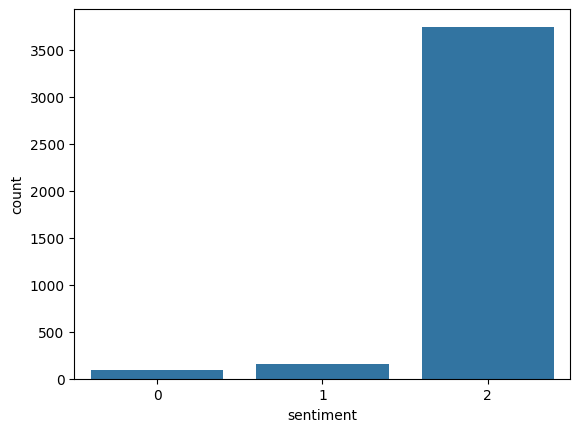

In [ ]:
sb.countplot(data = train,x=train_processed['sentiment'])

<Axes: xlabel='label', ylabel='count'>

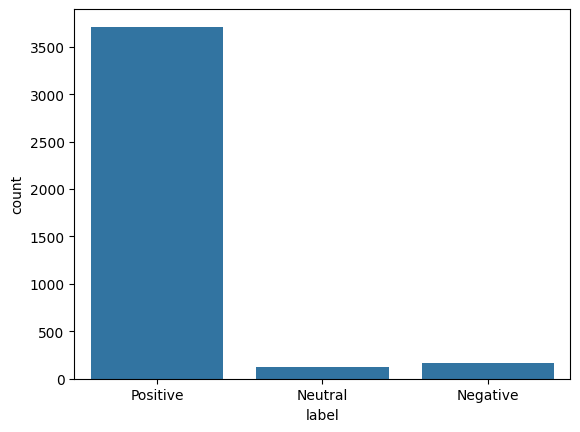

In [ ]:
sb.countplot(data = train,x=train_processed['label'])

In [ ]:
train_processed['label'] = train_processed['label'].map(label_mapping)

In [ ]:
train_processed.head(5)

,sentiment,Processed_Review,sentiment_score,label
0,2,purchase black fridaypros great price even sal...,0.96,2
1,2,purchase two amazon echo plus two dot plus fou...,0.96,2
2,1,average alexa option show thing screen still l...,0.00,1
3,2,good product exactly want good price,0.73,2
4,2,rd one purchase buy one niece case compare one...,0.13,2


In [ ]:
# Calculate sentiment scores for each sentence in the test dataframe
sentiment_score_test = [round(sentiment.polarity_scores(i)["compound"],2) for i in test_processed['Processed_Review']]
test_processed["sentiment_score"] = sentiment_score_test

In [ ]:
test_processed["label"] = test_processed["sentiment_score"].apply(sentiment_score)

In [ ]:
test_processed['label'] = test_processed['label'].map(label_mapping)

In [ ]:
test_processed['label'].value_counts()

label
2    927
1     38
0     35
Name: count, dtype: int64

In [ ]:
test_processed['sentiment'].value_counts()

sentiment
Positive    937
Neutral      39
Negative     24
Name: count, dtype: int64

In [ ]:
xgb_unbalanced_model.fit(tfidfDataFinal,train_processed['label'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Train prediction
xgb_unbalanced_train_pred = xgb_unbalanced_model.predict(tfidfDataFinal)

xgb_unbalanced_train_report = metrics.classification_report(train_processed['label'], xgb_unbalanced_train_pred)
print ("\nAccuracy on Training set: {:.4f}".format(accuracy_score(train_processed['label'], xgb_unbalanced_train_pred)))
print("Train classification report\n", xgb_unbalanced_train_report)


Accuracy on Training set: 0.9988
Train classification report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       167
           1       0.99      1.00      1.00       121
           2       1.00      1.00      1.00      3712

    accuracy                           1.00      4000
   macro avg       1.00      0.99      0.99      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
# Test prediction
xgb_unbalanced_test_pred = xgb_unbalanced_model.predict(test_vec)

In [ ]:
xgb_unbalanced_test_report = metrics.classification_report(test_processed['label'], xgb_unbalanced_test_pred)
print ("\nAccuracy on Test set: {:.4f}".format(accuracy_score(test_processed['label'], xgb_unbalanced_test_pred)))
print("Test classification report\n", xgb_unbalanced_test_report)


Accuracy on Test set: 0.9320
Test classification report
               precision    recall  f1-score   support

           0       0.59      0.29      0.38        35
           1       0.43      0.79      0.56        38
           2       0.98      0.96      0.97       927

    accuracy                           0.93      1000
   macro avg       0.66      0.68      0.64      1000
weighted avg       0.94      0.93      0.93      1000



Sentiment Score does not have much affect on the performance on Test Data.
Eventhough, Compared to other models (presumably that didn't use Vader), using sentiment labels generated by Vader significantly improved the F1-score. F1-score is a harmonic mean of precision and recall, providing a balanced view of model performance.

# **Project Task: Week 4 Applying LSTM**

## **1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)**
Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

**Applying LSTM**

Long Short Term Memory(LSTM) Networks are a special kind of the Recurrent Neural Networks(RNN) capable of learning long-term dependencies. LSTM can be very useful in text mining problems as it involves dependencies in the sentences which can be caught in the "memory" of the LSTM. Here, we will train a simple LSTM and LSTM with Word2Vec embedding for classifying the reviews into positive and negative sentiments using Keras library.

**Simple LSTM**

We need to preprocess the text data to 2D tensor before we begin fitting it into a simple LSTM. Firstly we will tokenize the corpus by considering only top words (top_words = 20000) and transforming reviews to numerical sequences using the trained tokenizer. Lastly we will make it sure that all the numerical sequences have the same length (maxlen=100) for modelling by truncating the long reviews and padding shorter reviews having zero values.


For constructing a simple LSTM, first embedding layer needs to be created.the embedding layer serves as a critical pre-processing step, particularly when dealing with sequential data like text. LSTMs typically handle numerical data. The embedding layer bridges the gap between categorical data (e.g., words in a sentence) and numerical representation suitable for LSTMs.
It transforms each category (e.g., word) into a dense vector in a lower-dimensional space. This vector embedding aims to capture semantic relationships between words. Similar words will have vector representations closer together in this space.

**Process in Embedding layer:**

Vocabulary: Each unique word in the training data is assigned a unique integer (index).

Embedding Layer: This layer takes the word index (integer) as input and outputs a dense vector representing that word.

Learning: Over training, the embedding layer learns to map similar words to vectors with similar values. For instance, "happy" and "joyful" might have closer vector representations compared to "sad."

The next layer is the LSTM layer with 128 memory units.

Finally, we will use a dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 prediction for the two classes (positive sentiment and negative sentiment). As it is a binary classification problem log loss is used as the loss function(binary_crossentropy in Keras). ADAM optimization algorithm will be used.


One-Hot Encoding, a technique used in machine learning to represent categorical data in a way that can be understood by algorithms.

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(train_processed[['sentiment']])                       #learns the unique categories present in the "sentiment" column
encoded_data = ohe.transform(train_processed[['sentiment']])  #Converts the categorical values into a numerical representation

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_data[0]

array([0., 0., 1.])

In [ ]:
encoded_data.shape

(4000, 3)

In [ ]:
# Splitting data into training set and validation
X_train, X_test, Y_train, Y_test = train_test_split(train_processed['Processed_Review'], encoded_data,test_size=0.1, random_state=1,stratify = encoded_data)

In [ ]:
X_train[:1], Y_train[:1]

(3231    ok device find google home good promise future
 Name: Processed_Review, dtype: object,
 array([[0., 1., 0.]]))

In [ ]:
top_words = 20000   #maximum number of words to consider in the vocabular
maxlen = 100        #maximum length of each sequence
batch_size = 32     #number of samples to process per training iteration
classes = 3         #number of distinct classes in the classification problem
epoch = 3           #number of times the training dataset will be iterated over during training

The Tokenizer class is used to convert text data into a numerical representation that machine learning models can understand. It does this by:

**Tokenization:** Splitting the text into individual words (or tokens).
Building Vocabulary: Creating a list of all unique words (tokens) in the training data.

**Word-to-Index Mapping:** Assigning a unique integer index to each word in the vocabulary.

After fitting the tokenizer, you can use it to convert new text data into numerical sequences of word indices. This process is called text vectorization.

**Example:**Let's say your training data contains the following sentences:

"This is a sample sentence."

"Another sentence with some words."

After fitting the tokenizer, it might create a vocabulary like this:

"this": 1

"is": 2

"a": 3

"sample": 4

"sentence": 5

"another": 6

"with": 7

"some": 8

"words": 9

Then, the first sentence would be converted to the sequence: [1, 2, 3, 4, 5].

**Why use Tokenization and Word-to-Index Mapping?**

Machine learning models can't directly process text. Tokenization and word-to-index mapping convert text into a format that models

In [ ]:
tokenizer = Tokenizer(nb_words=top_words) #consider only the top top_words most frequent words in the corpus
tokenizer.fit_on_texts(X_train)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [ ]:
type(tokenizer.index_word)

dict

In [ ]:
# view first few elements from the dict
{k: v for k, v in tokenizer.index_word.items() if k <= 5}

{1: 'love', 2: 'great', 3: 'tablet', 4: 'use', 5: 'buy'}

In [ ]:
tokenizer.num_words

20000

In [ ]:
#Retrieves the word-to-index mapping from a Tokenizer object.
word2index= tokenizer.word_index

In [ ]:
# actual vocab size
len(word2index)

3290

In [ ]:
#converts text data into numerical sequences using a pre-trained Tokenizer
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
sequences_train[0]

[355, 26, 99, 119, 48, 6, 855, 637]

In [ ]:
sequences_test[0]

[5, 318, 472, 5, 154]

In [ ]:
#Pads sequences of words to a fixed length
X_train_seq = pad_sequences(sequences_train, maxlen=maxlen, truncating="post", padding="pre")
X_test_seq = pad_sequences(sequences_test, maxlen=maxlen, truncating="post", padding="pre")

In [ ]:
X_train_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 355,  26,  99, 119,  48,   6, 855, 637], dtype=int32)

In [ ]:
X_test_seq[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   5, 318, 472,   5, 154], dtype=int32)

In [ ]:
Y_train.dtype

dtype('float64')

In [ ]:
Y_test.dtype

dtype('float64')

In [ ]:
print('X_train shape:', X_train_seq.shape) #(4000, 100)
print('X_test shape:', X_test_seq.shape) #(1000, 100)
print('y_train shape:', Y_train.shape) #(4000,)
print('y_test shape:', Y_test.shape) #(1000,)

X_train shape: (3600, 100)
X_test shape: (400, 100)
y_train shape: (3600, 3)
y_test shape: (400, 3)


In [ ]:
# Constructing a Simple LSTM
model1 = Sequential()
model1.add(Embedding(top_words, 128))                      #Maps words to 128-dimensional vectors
model1.add(Dropout(0.2))                                   #Randomly drops out 20% of the input units to prevent overfitting
model1.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  #128 units uses dropout and recurrent dropout to further prevent overfitting
model1.add(Dense(3,activation = "softmax"))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 2691971 (10.27 MB)
Trainable params: 2691971 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The below code Prints the shape of the weight matrix in the embedding layer of your model. The model1.layers[0] part accesses the first layer of your model, which is the embedding layer. The get_weights()[0] part retrieves the weight matrix of the embedding layer, and finally, shape gives you the dimensions of the weight matrix.

The first element of the tuple will be the number of words in your vocabulary (which is top_words in your code), and the second element will be the embedding dimension (which is 128 in your code)

In [ ]:
# Getting weight matrix of the embedding layer
print("Size of weight matrix in the embedding layer : ", \
      model1.layers[0].get_weights()[0].shape) #(20000, 128)

Size of weight matrix in the embedding layer :  (20000, 128)


In [ ]:
embedding_data = model1.layers[0].get_weights()[0]

In [ ]:
tsv_data = '\t'.join(str(x) for x in embedding_data[0])
for row in embedding_data[1:]:
    tsv_data += '\n' + '\t'.join(str(x) for x in row)

In [ ]:
with open('embedding_weights.tsv', 'w') as f:
    f.write(tsv_data)

In [ ]:
# Compiling LSTM
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model1.fit(X_train_seq, Y_train, batch_size=batch_size, epochs=epoch, verbose=1)  # Use epochs instead of nb_epoch

Epoch 1/3
113/113 [==============================] - 40s 307ms/step - loss: 0.2069 - accuracy: 0.9319
Epoch 2/3
113/113 [==============================] - 36s 316ms/step - loss: 0.1659 - accuracy: 0.9372
Epoch 3/3
113/113 [==============================] - 35s 309ms/step - loss: 0.1339 - accuracy: 0.9378


In [ ]:
# Model Evaluation
score = model1.evaluate(X_test_seq, Y_test, batch_size=batch_size)

13/13 [==============================] - 1s 40ms/step - loss: 0.1600 - accuracy: 0.9325


In [ ]:
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Test loss : 0.1600
Test accuracy : 0.9325


In [ ]:
y_pred = model1.predict(X_test_seq)

13/13 [==============================] - 1s 38ms/step


In [ ]:
y_pred

array([[1.9604525e-04, 1.4128053e-03, 9.9839109e-01],
       [1.2955112e-04, 1.0904787e-03, 9.9878001e-01],
       [1.4494537e-04, 1.0153884e-03, 9.9883968e-01],
       ...,
       [1.5141403e-03, 7.6757269e-03, 9.9081004e-01],
       [5.6904737e-05, 4.3900820e-04, 9.9950403e-01],
       [1.9078025e-05, 1.7113953e-04, 9.9980974e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
Y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
Y_test = np.argmax(Y_test, axis=1)

In [ ]:
Y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
report = classification_report(Y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        16
           2       0.94      0.99      0.97       375

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.88      0.93      0.90       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The LSTM model performed poorly for classes 0 and 1, with a precision, recall, and F1-score of 0 for both. This means the model almost never correctly identified these classes.

However, the model excelled at identifying class 2, achieving a precision of 0.94, recall of 1.00, and F1-score of 0.97. This indicates the model very accurately classified data points belonging to class 2.

Overall accuracy was high at 0.94, but this is skewed by the dominance of class 2 (375 out of 400 data points). Macro and weighted averages of precision, recall, and F1-score are all around 0.3, suggesting the model's performance is heavily reliant on class 2.

In conclusion, the LSTM model needs improvement in handling classes 0 and 1. It might be helpful to investigate data imbalance or class specific hyperparameter tuning.

**LSTM with Word2Vec Embedding**

In the simple LSTM model constructed above, the embedding class in Keras comes in handy for converting the numerical sequence of words into a word embedding but it doesn't take the semantic similarity of the words into account. The model assigns random weights to the embedding layer and learn the embeddings by minimizing the global error of the network.

Instead of using random weights we will use pretrained word embeddings for initializing the weight of an embedding layer. Here, we will use the trained Word2Vec embedding for intializing the weights of embedding layer in LSTM.

Load pretrained word embedding model.
Construct embedding layer using embedding matrix as weights.
Train a LSTM with Word2Vec embedding (embedding layer => LSTM layer => dense layer).
Compile and fit the model using log loss function and ADAM optimizer.

***Word2Vec***

Another common approach of word embedding is the prediction based embedding like Word2Vec model. Briefly, Word2Vec is a combination of two techniques: Continuous Bag of Words (CBoW) and Skip-Gram model. Both are Shallow Neural Networks which learn weights for the word vector representations.

Here, we will train Word2Vec model to create our own word vector representation using gensim library. Then we will fit the feature vectors of the reviews to the LSTM. Here's the workflow of this part: -

1.   Parse review text to sentences (Word2Vec model takes a list of sentences as inputs).
2.   Create vocabulary list using Word2Vec model.
3.   Transform each review into numerical representation by computing average feature vectors of words therein
4.   Fit the average feature vectors LSTM

Text Preprocessing

The following text preprocessing methods are implemented to convert raw reviews to cleaned review making it easier to do feature extraction in the next step.

* Remove non-character such as digits and symbols.
* Convert to lower case.
* Remove stop words such as "the" and "and" if needed.
* Convert to root words by stemming if needed.

In [ ]:
train_data.head(3)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral


In [ ]:
X = train_data['reviews.text']
Y = train_data['sentiment']

In [ ]:
# Splitting data into training set and validation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1,stratify = Y)

In [ ]:
y_train.value_counts()

sentiment
Positive    3374
Neutral      142
Negative      84
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

sentiment
Positive    375
Neutral      16
Negative      9
Name: count, dtype: int64

cleanText Function that takes a raw text string as input and returns a cleaned version of the text. Here's a breakdown of what the function does:

**Function Arguments:**

**raw_text:** This is the string containing the text you want to clean.

**remove_stopwords (optional):** A boolean flag indicating whether to remove stop words (common words like "the", "a", "an") from the text. Defaults to False.

**stemming (optional):** A boolean flag indicating whether to perform stemming on the words (reducing words to their root form). Defaults to False.

**split_text (optional):** A boolean flag indicating whether to return the cleaned text as a list of words or a single string. Defaults to False.

**Steps performed by the function:**

* **HTML Removal:**

It uses the BeautifulSoup library with the lxml parser to convert the raw_text into a BeautifulSoup object.

Then, it calls the get_text() method on the BeautifulSoup object to extract the plain text content, effectively removing HTML tags and markup.

* **Character filtering:**

It uses regular expressions with the re.sub function to replace all characters except letters (a-zA-Z) with spaces. This removes punctuation, symbols, and numbers from the text.

* **Lowercasing:**

It converts all characters in the text to lowercase using the lower() method. This ensures case-insensitive processing for further cleaning steps.

* **Word Splitting:**

It splits the processed text into a list of individual words using the split() method.

* **Stopword Removal (Optional):**

If the remove_stopwords flag is set to True, it removes stop words from the list of words.

It imports the stopwords library and uses the words("english") function to get a set of common English stop words.

It then uses list comprehension to iterate through the word list and keeps only the words that are not present in the stop word set.

* **Stemming (Optional):**

If the stemming flag is set to True, it performs stemming on the words.

It creates a SnowballStemmer object for the English language.

It uses list comprehension again to iterate through the word list and applies the stem method of the stemmer object to each word, effectively reducing it to its root form.

**Output:**

If the split_text flag is set to True, the function returns the cleaned text as a list of words.

Otherwise, it joins the cleaned words back into a single string separated by spaces and returns the string.

Overall, this function provides a useful tool for cleaning text data in Python by removing HTML, non-alphanumeric characters, converting to lowercase, optionally removing stop words, and optionally performing stemming.

In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

In [ ]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in x_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])

for d in x_test:
    X_test_cleaned.append(cleanText(d))

<ipython-input-131-823dc0be5f76>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html


Show a cleaned review in the training set : 
 my teens needed something they could use to read favorite books watch movies edit photos and catch up with friends on social media the kindle fire tablet covered all this and more at a great price


In [ ]:
# Splitting review text into parsed sentences using NLTK's punkt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')  #Loads the pre-trained English Punkt sentence tokenizer

Function **parseSent** takes a review text string, a loaded tokenizer, and an optional flag for stop word removal, and returns a list of cleaned sentences.

**Arguments:**

* **review:** The raw review text string.

* **tokenizer:** A loaded sentence tokenizer object (like the Punkt tokenizer loaded previously).
* **remove_stopwords (optional):** A boolean flag indicating whether to remove stop words from each sentence during cleaning (defaults to False).

**Steps:**

* **Sentence Tokenization:**

The function uses review.strip() to remove any leading or trailing whitespace from the review text.

It then calls the tokenize method of the tokenizer object with the cleaned review text. This splits the text into a list of raw_sentences based on punctuation and sentence boundaries defined in the tokenizer model.

* **Cleaning Sentences (optional):**

An empty list sentences is initialized to store the cleaned sentences.

The code iterates through each raw_sentence in the list of raw sentences.
It checks if the length of the raw_sentence is greater than zero (to avoid empty sentences).

If the sentence is not empty:

It calls the cleanText function (assumed to be defined elsewhere) on the raw_sentence with the following arguments:
   
   raw_sentence: The raw sentence text.
   
   remove_stopwords: The value of the remove_stopwords flag passed to the parseSent function.
   
   split_text=True: This ensures the cleanText function returns a list of words for each sentence, suitable for further sentence-level processing.

The cleaned sentence list returned by cleanText is then appended to the sentences list.

* **Return Cleaned Sentences:**

Finally, the function returns the sentences list containing the cleaned sentences from the review text.

In [ ]:
def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences

In [ ]:
# Parsing each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)

print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

3600 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['my', 'teens', 'needed', 'something', 'they', 'could', 'use', 'to', 'read', 'favorite', 'books', 'watch', 'movies', 'edit', 'photos', 'and', 'catch', 'up', 'with', 'friends', 'on', 'social', 'media', 'the', 'kindle', 'fire', 'tablet', 'covered', 'all', 'this', 'and', 'more', 'at', 'a', 'great', 'price']


In [ ]:
w2v = Word2Vec()

***Creating Vocabulary List using Word2Vec Model***

As we have a set of cleaned and parsed sentences from the training data, we will train our own word vector representations by specifying the embedding dimension (= length of feature vector).

Trains a Word2Vec model on the parsed sentences (sentences) and then saves the trained model. Here's a breakdown of the code:

**Code Explanation:**

* **Hyperparameter settings:**

  * **num_features:** This sets the embedding dimension (size of the word vectors) to 300, a common choice.
  * **min_word_count:** This filters out words that appear less than 10 times in the training data, reducing vocabulary size and noise. You can adjust this based on your data size and desired vocabulary.
  * **num_workers:** This sets the number of worker threads to use for training (4 in this case), which can improve training speed on multi-core systems.
  * **context:** This defines the window size (10 words in this case) for considering surrounding words to learn word context. You can experiment with different window sizes.
  * **downsampling:** This sets the downsampling rate (1e-3) for frequent words to address issues with high-frequency words dominating the training process.

* **Training the Model:**

It creates a Word2Vec model instance (w2v) using the gensim library.

It passes the list of parsed sentences (sentences) as the training data.
Other arguments passed to the Word2Vec constructor match the defined hyperparameters.

The w2v.init_sims(replace=True) line initializes word vector similarities after training.

* **Saving the Model:**

It saves the trained Word2Vec model using the w2v.save method with a descriptive filename indicating the hyperparameters used.

* **Evaluating Vocabulary:**

It prints the number of words in the vocabulary list using len(w2v.wv.index_to_key). This shows the size of the learned vocabulary after applying filtering with min_word_count.

It prints the first 10 words in the vocabulary list using slicing ([:10]) to get a glimpse of the learned vocabulary.

In [ ]:
# Fix Training Word2Vec model ...
# Fitting parsed sentences to Word2Vec model
num_features = 300  # embedding dimension
min_word_count = 10
num_workers = 4
context = 10
downsampling = 1e-3

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count,
               window=context, sample=downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context")  # save trained word2vec model

print("Number of words in the vocabulary list: %d \n" % len(w2v.wv.index_to_key))  # 4016
print("Show first 10 words in the vocabulary list: \n", w2v.wv.index_to_key[:10])


Training Word2Vec model ...



<ipython-input-137-3c0f9728617c>:12: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


Number of words in the vocabulary list: 1009 

Show first 10 words in the vocabulary list: 
 ['the', 'it', 'and', 'to', 'i', 'for', 'a', 'is', 'my', 'this']


In [ ]:
# Loading pretrained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

# Getting Word2Vec embedding matrix
embedding_matrix = w2v.wv.vectors  # embedding matrix, type = numpy.ndarray
print("Shape of embedding matrix : ", embedding_matrix.shape)  # (vocabulary size, embedding dimension)
print("feature vector of the first word in the vocabulary list:",w2v.wv.vectors[0])

Shape of embedding matrix :  (1009, 300)
feature vector of the first word in the vocabulary list: [ 7.04897344e-02  3.41240503e-02  9.07287188e-03  6.09439611e-02
 -2.72937976e-02 -9.00142863e-02  3.34164239e-02  1.20420836e-01
 -3.65851098e-03 -8.23087916e-02  3.39198634e-02  2.99255666e-03
  1.04456870e-02 -3.75092612e-03 -4.18801978e-02 -5.01222387e-02
  2.42217239e-02 -4.96682189e-02 -1.71494466e-04 -6.10330291e-02
  2.04716641e-02  2.47244686e-02  4.21854295e-02  2.49775639e-03
  3.82570028e-02  1.16743650e-02 -1.03916459e-01  3.89004946e-02
 -6.99992701e-02 -9.87715200e-02 -5.70845790e-03  1.15483766e-02
  3.90182324e-02 -2.35325862e-02 -1.35631859e-02  4.67027575e-02
  2.54735965e-02 -1.00667812e-01 -6.05711564e-02 -3.13312635e-02
 -8.19955692e-02  2.09052432e-02 -1.01266457e-02 -8.17939714e-02
  6.36693761e-02  2.69623119e-02  4.41007353e-02  1.00577332e-01
 -5.29955402e-02  1.13873288e-01  7.70671340e-03  1.02182433e-01
 -2.58946419e-02  2.90920865e-02 -2.17645578e-02 -1.20469

In [ ]:
# Your existing code here
top_words = embedding_matrix.shape[0]  # 4016
maxlen = 100
batch_size = 32
nb_classes = 3
nb_epoch = 3

In [ ]:
# Vectorizing X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words)  # Considering only top 20000 words in the corpus
tokenizer.fit_on_texts(X_train_cleaned)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [ ]:
# tokenizer.word_index # access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train_cleaned)
sequences_test = tokenizer.texts_to_sequences(X_test_cleaned)

In [ ]:
len(X_train_cleaned)

3600

In [ ]:
len(X_test_cleaned)

400

In [ ]:
x_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
x_test_seq = pad_sequences(sequences_test, maxlen=maxlen)

In [ ]:
y_train.shape

(3600,)

In [ ]:
y_train.dtype

dtype('O')

In [ ]:
y_test.shape

(400,)

In [ ]:
y_test.dtype

dtype('O')

In [ ]:
y_test = y_test.map(label_mapping)

In [ ]:
# One-Hot Encoding of y_train and y_test
y_test_seq = to_categorical(y_test, nb_classes)

In [ ]:
ytrain_Labelled = y_train.map(label_mapping)

In [ ]:
oversample = SMOTE(sampling_strategy='not majority')
# fit and apply the transform
x, y = oversample.fit_resample(x_train_seq,ytrain_Labelled)

In [ ]:
x_train_seq.shape

(3600, 100)

In [ ]:
ytrain_Labelled.shape

(3600,)

In [ ]:
x.shape

(10122, 100)

In [ ]:
y.shape

(10122,)

In [ ]:
y.dtype

dtype('int64')

In [ ]:
y[0]

2

In [ ]:
y_train_seq = to_categorical(y, nb_classes)

In [ ]:
y_train_seq[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
# Constructing Word2Vec embedding layer
embedding_layer = Embedding(embedding_matrix.shape[0], # 4016
                            embedding_matrix.shape[1], # 300
                            weights=[embedding_matrix],
                            mask_zero=True) # Add mask_zero=True to ignore padding tokens)

# Constructing LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Fix dropout arguments
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compiling model
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model2.fit(x, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)  # Fix 'nb_epoch' to 'epochs'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         302700    
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 522735 (1.99 MB)
Trainable params: 522735 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
317/317 [==============================] - 136s 413ms/step - loss: 0.5600 - accuracy: 0.5087
Epoch 2/3
317/317 [============================

In [ ]:
# Model evaluation
score = model2.evaluate(x_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

13/13 [==============================] - 1s 54ms/step - loss: 0.3242 - accuracy: 0.7975
Test loss : 0.3242
Test accuracy : 0.7975


In [ ]:
# Getting weight matrix of the embedding layer
print("Size of weight matrix in the embedding layer : ", \
      model2.layers[0].get_weights()[0].shape) #(20000, 128)

# Getting weight matrix of the hidden layer
print("Size of weight matrix in the hidden layer : ", \
      model2.layers[1].get_weights()[0].shape) #(128, 512)  weight dim of LSTM - w

# Getting weight matrix of the output layer
print("Size of weight matrix in the output layer : ", \
      model2.layers[2].get_weights()[0].shape) #(128, 2) weight dim of dense layer

Size of weight matrix in the embedding layer :  (1009, 300)
Size of weight matrix in the hidden layer :  (300, 512)
Size of weight matrix in the output layer :  (128, 3)


In [ ]:
y_pred = model2.predict(x_test_seq)

13/13 [==============================] - 1s 57ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.08      0.22      0.11         9
           1       0.06      0.19      0.10        16
           2       0.96      0.84      0.89       375

    accuracy                           0.80       400
   macro avg       0.37      0.42      0.37       400
weighted avg       0.90      0.80      0.85       400



Summary of the LSTM model using word2vec embedding with a dictionary of 1009 words suffers from insufficient data. This is evident from the low overall accuracy (80%) and macro average precision, recall, and F1-score (all around 0.37).